In [ ]:
3_companies.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [92]:
path_to_file = "3_user_data.csv" 
path_to_file_2 = "3_logs.csv" 
user_data = pd.read_csv(path_to_file, sep = ',')
logs_data = pd.read_csv(path_to_file_2, sep = ',')

In [93]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [64]:
logs_data.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [94]:
logs_data

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [123]:
counts = logs_data.query('success == 1') \
    .groupby(['client'], as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False) \
    .rename(columns = {'success' : 'count_success'})
maxx = max(counts.count_success)

In [125]:
counts = counts.query('count_success == @maxx') \
    .groupby(['client'], as_index = False).agg({'count_success' : 'count'})

In [131]:
counts['client']

0    12179
1    28719
2    36165
3    52870
4    61468
5    61473
6    78349
7    82563
8    92584
Name: client, dtype: int64

In [132]:
logs_data.query('success == 1') \
    .groupby(['platform'], as_index = False) \
    .agg({'time' : 'count'}) \
    .sort_values('time', ascending = False) \
    .rename(columns = {'time' : 'count_platform'})

,platform,count_platform
1,phone,2019
0,computer,1090
2,tablet,180


In [133]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [137]:
df = logs_data.merge(user_data, on='client')

In [141]:
df.query('premium == 1') \
    .groupby(['platform'],as_index = False) \
    .agg({'time' : 'count'}) \
    .sort_values('time', ascending = False) \
    .rename(columns = {'time' : 'count_platform'})

,platform,count_platform
1,phone,246
0,computer,150
2,tablet,24


C:\Users\Ilya-\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ilya-\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

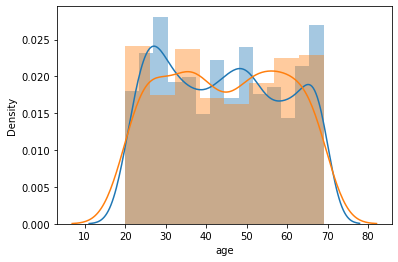

In [156]:
sns.distplot(df.query('premium == 0')['age'])
sns.distplot(df.query('premium == 1')['age'])

In [142]:
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [157]:
success_client = df.query('premium == 0') \
    .groupby(['client'],as_index = False) \
    .agg({'time' : 'count'})
success_client

,client,time
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2543,99908,1
2544,99927,1
2545,99931,1
2546,99952,1


C:\Users\Ilya-\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

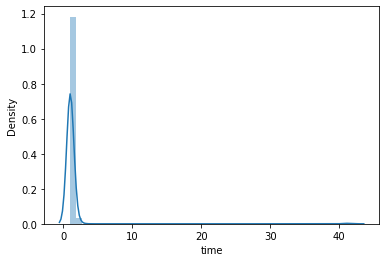

In [159]:
sns.distplot(success_client.time)

C:\Users\Ilya-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

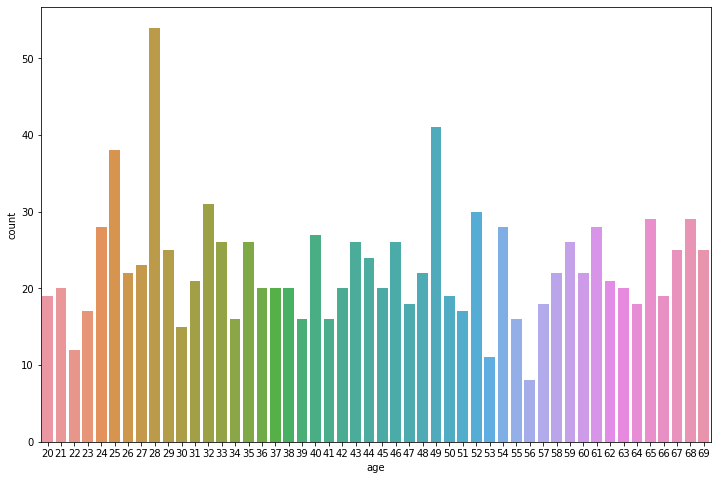

In [164]:
plt.figure(figsize=(12, 8))
sns.countplot(df.query("platform == 'computer'")['age'])